## 크롤링 과제 시각화 파일

### 1. 인스타 크롤링 파일로 시각화
* 해시태그 빈도수에 따른 워드 클라우드 

### 2. 스타벅스 크롤링 파일
* 매장 분포도 바 그래프
* 매장 분포도 지도에 표시 (folium)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,080 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.font_manager as fm
import matplotlib as mpl
from collections import Counter
import seaborn as sns

### 1. 인스타 크롤링 파일로 시각화

In [3]:
instar_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dt2/insta/instabucks.xlsx')
instar_df.head()

content  ...                                               tags
0  2021년 여름 3차 프로모션미치겠네…. ㅠㅠ 예쁜데 눙물이#스타벅스 #STARBU...  ...  ['#스타벅스', '#STARBUCKS', '#スターバックス', '#星巴克', '#...
1  다음주 대망의 서머 3차💙예상처럼 뭐... 좀 이쁘네🤣일부 공개지만 벌써 맘에 드는...  ...  ['#스타벅스', '#starbucks', '#스타벅스텀블러', '#스타벅스서머엠디...
2  🍍☀️Starbucks china 💓“스타벅스 중국 여름 MD 7/13일 공식몰 오...  ...  ['#중국스타벅스', '#스타벅스', '#스타벅스중국', '#스타벅스지압텀', '#...
3  -재택근무 중 즐거운 점심시간,잠깐의 여유를 즐겨보려 해요😊오늘은 프프레시피와는 또...  ...  ['#스타벅스RTD', '#프라푸치노', '#커피', '#레시피', '#직딩', '...
4  🎀🎀🎀🎀🎀🎀🎀🎀#代行後記.おはようございます☀今日は久しぶりにホムスタで朝活できました😌(...  ...  ['#代行後記.おはようございます☀今日は久しぶりにホムスタで朝活できました😌(グローバルM...

[5 rows x 5 columns]

In [ ]:
instar_df.shape

(293, 5)

In [ ]:
#광고성 중복 글 제거(content)

instar_df.drop_duplicates(subset=['content'], inplace=True)
instar_df.to_excel('/content/drive/MyDrive/Colab Notebooks/dt2/insta/istar_sb_raw.xlsx', index=False)

In [ ]:
raw_total=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dt2/insta/istar_sb_raw.xlsx' )
raw_total.head()

content  ...                                               tags
0  2021년 여름 3차 프로모션미치겠네…. ㅠㅠ 예쁜데 눙물이#스타벅스 #STARBU...  ...  ['#스타벅스', '#STARBUCKS', '#スターバックス', '#星巴克', '#...
1  다음주 대망의 서머 3차💙예상처럼 뭐... 좀 이쁘네🤣일부 공개지만 벌써 맘에 드는...  ...  ['#스타벅스', '#starbucks', '#스타벅스텀블러', '#스타벅스서머엠디...
2  🍍☀️Starbucks china 💓“스타벅스 중국 여름 MD 7/13일 공식몰 오...  ...  ['#중국스타벅스', '#스타벅스', '#스타벅스중국', '#스타벅스지압텀', '#...
3  -재택근무 중 즐거운 점심시간,잠깐의 여유를 즐겨보려 해요😊오늘은 프프레시피와는 또...  ...  ['#스타벅스RTD', '#프라푸치노', '#커피', '#레시피', '#직딩', '...
4  🎀🎀🎀🎀🎀🎀🎀🎀#代行後記.おはようございます☀今日は久しぶりにホムスタで朝活できました😌(...  ...  ['#代行後記.おはようございます☀今日は久しぶりにホムスタで朝活できました😌(グローバルM...

[5 rows x 5 columns]

In [ ]:
raw_total.shape

(280, 5)

#### tag 워드 클라우드

In [ ]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

tags_total[:10]

['#스타벅스',
 '#STARBUCKS',
 '#スターバックス',
 '#星巴克',
 '#스벅',
 '#スタバ',
 '#스타벅스MD',
 '#STARBUCKSTumbler',
 '#STARBUCKSMug',
 '#Tumbler']

In [ ]:
tag_count = Counter(tags_total)

In [ ]:
tag_count

Counter({'#스타벅스': 231,
         '#STARBUCKS': 8,
         '#スターバックス': 17,
         '#星巴克': 14,
         '#스벅': 29,
         '#スタバ': 13,
         '#스타벅스MD': 7,
         '#STARBUCKSTumbler': 4,
         '#STARBUCKSMug': 4,
         '#Tumbler': 4,
         '#Mug': 4,
         '#보온병': 4,
         '#STARBUCKSKOREA': 4,
         '#스타벅스코리아': 6,
         '#스벅MD': 4,
         '#MD': 4,
         '#별다방': 5,
         '#starbucks': 42,
         '#스타벅스텀블러': 6,
         '#스타벅스서머엠디3차': 1,
         '#7월20일출시': 1,
         '#오픈런고고🏃': 1,
         '#모기와의전쟁예고🙉': 1,
         '#중국스타벅스': 1,
         '#스타벅스중국': 2,
         '#스타벅스지압텀': 2,
         '#스타벅스머그': 2,
         '#스타벅스여름': 1,
         '#starbuckschina': 6,
         '#스타벅스RTD': 2,
         '#프라푸치노': 5,
         '#커피': 13,
         '#레시피': 1,
         '#직딩': 3,
         '#재택근무': 2,
         '#점심시간': 1,
         '#여유': 3,
         '#STARBUCKS_RTD': 1,
         '#Frappuccino': 1,
         '#Coffee': 2,
         '#代行後記.おはようございます☀今日は久しぶりにホムスタで朝活できました😌(グローバルMD

In [ ]:
stopword = ['#맞팔','#선팔','#e번주','#중국스타벅스','#7월20일출시','#농산','#축산','#수산','#랜더스','#랜디','#오픈런고고🏃','#모기와의전쟁예고🙉','#친구해요', '#복리의마법', '', '#수익','#임용', '#확신의화신','#代行後記.おはようございます☀今日は久しぶりにホムスタで朝活できました😌(グローバルMDの時は1番の人がいないの😂).Fila']

tag_selected = []
for tag in tags_total:
    if tag not in stopword:
        tag_selected.append(tag)

tag_selected_counts = Counter(tag_selected)
tag_selected_counts.most_common(80)

[('#스타벅스', 231),
 ('#일상', 57),
 ('#starbucks', 42),
 ('#스벅', 29),
 ('#여름', 29),
 ('#이마트', 24),
 ('#피코크', 23),
 ('#델리', 22),
 ('#노브랜드', 22),
 ('#행사상품', 21),
 ('#SSG', 21),
 ('#e상품', 21),
 ('#e마트', 20),
 ('#소통', 18),
 ('#スターバックス', 17),
 ('#좋아요●', 17),
 ('#이벤트', 16),
 ('#데일리', 16),
 ('#아이스아메리카노', 15),
 ('#星巴克', 14),
 ('#スタバ', 13),
 ('#커피', 13),
 ('#일상스타그램', 13),
 ('#프리퀀시', 13),
 ('#좋아요', 12),
 ('#먹스타그램', 11),
 ('#starbuckstumbler', 11),
 ('#daily', 10),
 ('#팔로우', 9),
 ('#스타벅스랜턴', 9),
 ('#STARBUCKS', 8),
 ('#아침', 8),
 ('#커피스타그램', 8),
 ('#스타벅스MD', 7),
 ('#아메리카노', 7),
 ('#coffee', 7),
 ('#카페', 7),
 ('#스타벅스코리아', 6),
 ('#스타벅스텀블러', 6),
 ('#starbuckschina', 6),
 ('#전주한옥마을맛집', 6),
 ('#선팔하면맞팔', 6),
 ('#카페스타그램', 6),
 ('#목요일', 6),
 ('#스타벅스프리퀀시', 6),
 ('#군산속눈썹펌', 6),
 ('#별다방', 5),
 ('#프라푸치노', 5),
 ('#전주한옥마을', 5),
 ('#전주옷가게', 5),
 ('#cafe', 5),
 ('#아이폰', 5),
 ('#오오티디', 5),
 ('#인스타그램', 5),
 ('#인스타', 5),
 ('#사진', 5),
 ('#데일리룩', 5),
 ('#starbuckscoffee', 5),
 ('#selfie', 5),
 ('#스타벅스md', 5),
 ('#기프티콘', 5

In [ ]:
from wordcloud import WordCloud
plt.rc('font',family='NanumSquareRound')

In [ ]:
tag_counts_df = pd.DataFrame(tag_selected_counts.most_common(80))
tag_counts_df.columns=['tag','counts']

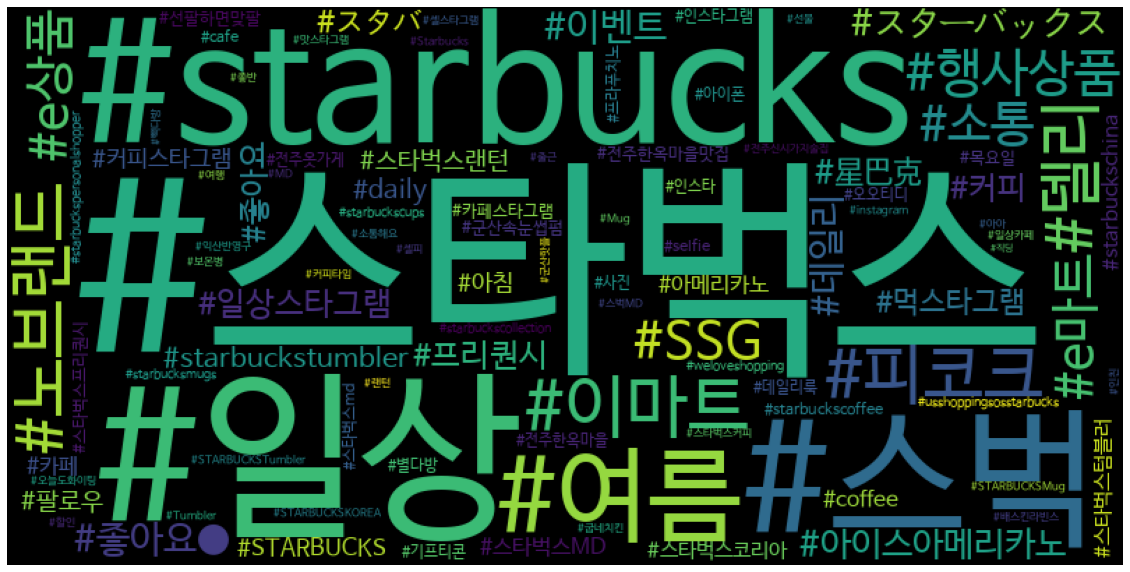

In [ ]:
fontpath = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wordcloud = WordCloud(font_path= fontpath,
                      background_color = 'black',
                      width = 800,
                      height=400,
                      max_words=100,
                      relative_scaling=0.3)

wordcloud.generate_from_frequencies(tag_selected_counts)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/instar_sb_wordcloud.png')

### 2. 스타벅스 크롤링 파일 시각화

In [5]:
results_df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/insta/crwalling_starbucks.xlsx')

sbuck_final = results_df.head().T
sbuck_final.columns = ['name','address','latitude','longitude']
sbuck_final.head()

name                              address   latitude   longitude
0  역삼아레나빌딩       서울특별시 강남구 언주로 425 (역삼동)1522-3232  37.501087  127.043069
1   논현역사거리      서울특별시 강남구 강남대로 538 (논현동)1522-3232  37.510178  127.022223
2  신사역성일빌딩      서울특별시 강남구 강남대로 584 (논현동)1522-3232  37.514132  127.020563
3   국기원사거리      서울특별시 강남구 테헤란로 125 (역삼동)1522-3232  37.499517  127.031495
4   스탈릿대치R    서울특별시 강남구 남부순환로 2947 (대치동)1522-3232  37.494668  127.062583

In [38]:
sbuck_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 555
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       556 non-null    object
 1   address    556 non-null    object
 2   latitude   556 non-null    object
 3   longitude  556 non-null    object
 4   gu         556 non-null    object
 5   address2   556 non-null    object
dtypes: object(6)
memory usage: 50.4+ KB


In [41]:
#df['a'] = df['a'].astype(float, errors = 'raise')
sbuck_final.latitude = sbuck_final.latitude.astype(float, errors = 'raise')
sbuck_final.longitude = sbuck_final.longitude.astype(float, errors = 'raise')
sbuck_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 555
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       556 non-null    object 
 1   address    556 non-null    object 
 2   latitude   556 non-null    float64
 3   longitude  556 non-null    float64
 4   gu         556 non-null    object 
 5   address2   556 non-null    object 
dtypes: float64(2), object(4)
memory usage: 50.4+ KB


In [44]:
sbuck_final.name.unique()

array(['역삼아레나빌딩  ', '논현역사거리  ', '신사역성일빌딩  ', '국기원사거리  ', '스탈릿대치R  ',
       '봉은사역  ', '압구정윤성빌딩  ', '코엑스별마당  ', '삼성역섬유센터R  ', '압구정R  ',
       '수서역R  ', '양재강남빌딩R  ', '선릉동신빌딩R  ', '봉은사로선정릉  ', '강남오거리  ',
       '스타필드코엑스몰R  ', '강남구청정문  ', '도곡공원  ', '강남R  ', '대치은마사거리  ',
       '청담영동대로  ', '압구정  ', '신사가로수  ', '청담스타R  ', '강남우성  ', '학동사거리  ',
       '대치사거리  ', '포스코사거리  ', '을지병원사거리  ', '신사역  ', '도곡역  ', '서울세관사거리  ',
       '청담사거리  ', '한티역  ', '역삼초교사거리  ', '코엑스몰  ', '가로수길  ', '역삼대로  ',
       '역삼포스코  ', '강남대로  ', '청담  ', '삼성도심공항  ', '삼성교  ', '학동역  ', '대치  ',
       'SSG마켓도곡R  ', '삼성  ', '선릉세화빌딩  ', '압구정역  ', '압구정로  ', '구역삼사거리  ',
       '큰길타워  ', '강남구청역  ', '대치역  ', '포이  ', '아크플레이스  ', '학여울역  ',
       '선정릉역  ', '삼성현대힐  ', 'GS타워  ', '압구정미소  ', '선릉역  ', '코엑스사거리  ',
       '역삼럭키  ', '차병원사거리  ', '청담공원  ', '신압구정  ', '아크로힐스논현  ', '뱅뱅사거리  ',
       '강남비젼타워  ', '역삼역  ', '압구정로데오역  ', '르네상스사거리  ', '포스코  ', '선릉로  ',
       '논현힐탑  ', '도산가로수길  ', '대치한티  ', '코엑스아셈타워  ', '도산사거리  ', '강남세곡  ',
       '대치삼성프라자

In [7]:
gugun = []
for gu in sbuck_final['address']:
    gugun.append(gu[6:9])

sbuck_final['gu'] = gugun
sbuck_final.head()

name                              address   latitude   longitude   gu
0  역삼아레나빌딩       서울특별시 강남구 언주로 425 (역삼동)1522-3232  37.501087  127.043069  강남구
1   논현역사거리      서울특별시 강남구 강남대로 538 (논현동)1522-3232  37.510178  127.022223  강남구
2  신사역성일빌딩      서울특별시 강남구 강남대로 584 (논현동)1522-3232  37.514132  127.020563  강남구
3   국기원사거리      서울특별시 강남구 테헤란로 125 (역삼동)1522-3232  37.499517  127.031495  강남구
4   스탈릿대치R    서울특별시 강남구 남부순환로 2947 (대치동)1522-3232  37.494668  127.062583  강남구

In [8]:
sbuck_gu = sbuck_final['gu'].replace('영등포', '영등포구').replace('동대문', '동대문구').replace('서대문', '서대문구').replace('중구 ', '중구')

In [10]:
sbuck_final['address2'] = sbuck_final['address'].str.split('(').str[0]
sbuck_final.head()

name                              address  ...   gu               address2
0  역삼아레나빌딩       서울특별시 강남구 언주로 425 (역삼동)1522-3232  ...  강남구     서울특별시 강남구 언주로 425 
1   논현역사거리      서울특별시 강남구 강남대로 538 (논현동)1522-3232  ...  강남구    서울특별시 강남구 강남대로 538 
2  신사역성일빌딩      서울특별시 강남구 강남대로 584 (논현동)1522-3232  ...  강남구    서울특별시 강남구 강남대로 584 
3   국기원사거리      서울특별시 강남구 테헤란로 125 (역삼동)1522-3232  ...  강남구    서울특별시 강남구 테헤란로 125 
4   스탈릿대치R    서울특별시 강남구 남부순환로 2947 (대치동)1522-3232  ...  강남구  서울특별시 강남구 남부순환로 2947 

[5 rows x 6 columns]

In [11]:
print(len(sbuck_final['address2'][0]))
starbucks_df = sbuck_final['address2'].str.strip()
starbucks_df.head()

18


0       서울특별시 강남구 언주로 425
1      서울특별시 강남구 강남대로 538
2      서울특별시 강남구 강남대로 584
3      서울특별시 강남구 테헤란로 125
4    서울특별시 강남구 남부순환로 2947
Name: address2, dtype: object

In [12]:
sbuck_final['address2'] =starbucks_df
sbuck_final.head()
print(len(sbuck_final['address2'][0])) # 주소 맨끝에 공백 제거 완료

17


In [13]:
gu_count = Counter(sbuck_gu)
gu_count.most_common()

[('강남구', 85),
 ('중구', 56),
 ('서초구', 48),
 ('종로구', 40),
 ('영등포구', 38),
 ('마포구', 32),
 ('송파구', 32),
 ('용산구', 21),
 ('서대문구', 20),
 ('강서구', 19),
 ('양천구', 17),
 ('광진구', 16),
 ('강동구', 16),
 ('성북구', 14),
 ('노원구', 13),
 ('관악구', 11),
 ('금천구', 11),
 ('동작구', 11),
 ('구로구', 11),
 ('성동구', 10),
 ('동대문구', 9),
 ('은평구', 8),
 ('중랑구', 8),
 ('강북구', 5),
 ('도봉구', 3),
 ('구 아', 1),
 ('구 광', 1)]

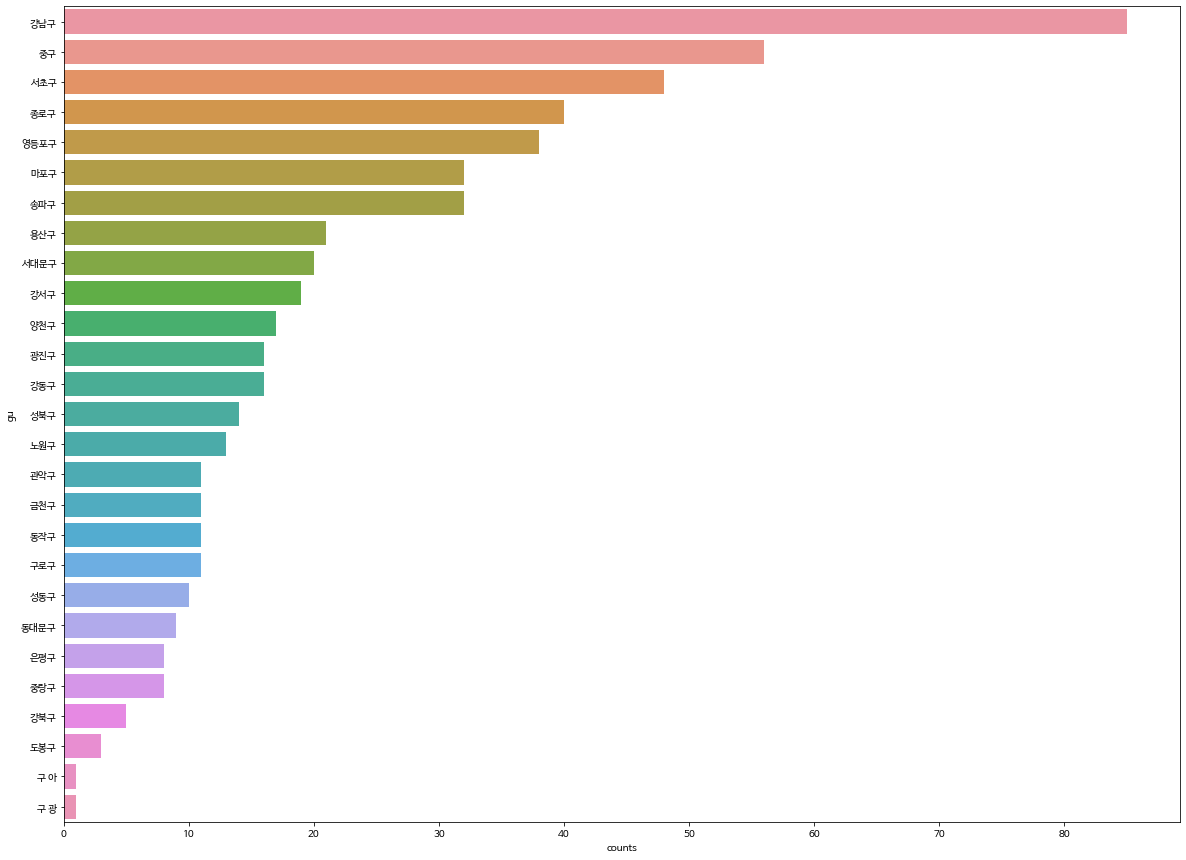

In [14]:
gu_counts_df = pd.DataFrame(gu_count.most_common())
gu_counts_df.columns=['gu','counts']

plt.figure(figsize = (20,15))
sns.barplot(x='counts', y='gu', data=gu_counts_df) 
plt.show()

## Folium 연습하기
* https://youtu.be/ay2VwNl_QMg
* https://python-visualization.github.io/folium/quickstart.html
* https://github.com/southkorea/southkorea-maps
* https://www.google.com/maps/@37.4980751,127.027748,17z?entry=yt

In [17]:
#!pip install folium

In [29]:
import folium

In [19]:
m = folium.Map(location=[37.4980751,127.027748],zoom_start=15)
m.save('map.html')

In [20]:
folium.CircleMarker(location=[37.4980751,127.027748],
              radius=100,
              color="#fff",
              fil_color='#fffggg',
              popup='강남역', 
              icon=folium.Icon(color='yellow', 
                               icon='star')).add_to(m)

In [21]:
m

In [30]:
#geo json 가져오기

import urllib.request, json
with urllib.request.urlopen("https://raw.githubusercontent.com/suanlab/dataset/master/seoul_municipalities_geo_simple.json") as url:
    data = json.loads(url.read().decode())
    print(data)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'code': '11250', 'name': '강동구', 'name_eng': 'Gangdong-gu', 'base_year': '2013'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[127.11519584981606, 37.557533180704915], [127.11879551821994, 37.557222485451305], [127.12146867175024, 37.55986003393365], [127.12435254630417, 37.56144246249796], [127.13593925898998, 37.56564793048277], [127.14930548011061, 37.56892250303897], [127.15511020940411, 37.57093642128295], [127.16683184366129, 37.57672487388627], [127.17038810813094, 37.576465605301046], [127.17607118428914, 37.57678573961056], [127.17905504160184, 37.57791388161732], [127.17747787800164, 37.57448983055031], [127.1781775408844, 37.571481967974336], [127.17995281860672, 37.569309661290504], [127.18122821955262, 37.56636089217979], [127.18169407550688, 37.56286338914073], [127.18408792330152, 37.55814280369575], [127.18350810324185, 37.550053002101485], [127.1852644795464, 37.54888592026534], [127.1848

In [31]:
import json
json_string = json.dumps(data)

In [24]:
f = open("seoul_geo.json", 'w')
f.write(json_string)
f.close()

In [25]:
f = open("/content/seoul_geo.json", 'r')
geo = json.loads(f.read())

In [26]:
folium.GeoJson(geo, name='seoul').add_to(m)

In [27]:
m

In [28]:
m.save('map.html')

## 지도에 표시하기

In [32]:
url = "https://raw.githubusercontent.com/suanlab/dataset/master"
seoul_geo = f'{url}/seoul_municipalities_geo_simple.json'


In [33]:
import requests
sbuck_m = folium.Map(
    location=[37.528043, 126.980238],
    zoom_start=10, 
    
)
folium.Marker(location=[37.528043, 126.980238],
              icon=folium.Icon(color='green', icon='star')).add_to(sbuck_m)

folium.GeoJson(json.loads(requests.get(seoul_geo).text),
               name='seoul_municipalities'
               ).add_to(sbuck_m)

sbuck_m

In [34]:
from branca.colormap import linear
colormap = linear.Blues_09.scale(
    gu_counts_df.counts.min(),
    gu_counts_df.counts.max(),
)

colormap

In [35]:
gu_dict = gu_counts_df.set_index('gu')['counts']
color_dict = {str(key): colormap(gu_dict[key]) for key in gu_dict.keys() }
color_dict 
#gu 색깔 지정

{'강남구': '#08306bff',
 '강동구': '#d4e5f4ff',
 '강북구': '#eef5fcff',
 '강서구': '#cde0f2ff',
 '관악구': '#e0ecf8ff',
 '광진구': '#d4e5f4ff',
 '구 광': '#f7fbffff',
 '구 아': '#f7fbffff',
 '구로구': '#e0ecf8ff',
 '금천구': '#e0ecf8ff',
 '노원구': '#dbe9f6ff',
 '도봉구': '#f3f8feff',
 '동대문구': '#e4eff9ff',
 '동작구': '#e0ecf8ff',
 '마포구': '#a0cbe2ff',
 '서대문구': '#cbdef1ff',
 '서초구': '#57a1cfff',
 '성동구': '#e2eef9ff',
 '성북구': '#d9e8f6ff',
 '송파구': '#a0cbe2ff',
 '양천구': '#d2e3f3ff',
 '영등포구': '#83bcdcff',
 '용산구': '#c9ddf0ff',
 '은평구': '#e7f1faff',
 '종로구': '#7ab6d9ff',
 '중구': '#3a8ac2ff',
 '중랑구': '#e7f1faff'}

In [42]:
sbuck_m = folium.Map(location=[sbuck_final['latitude'].mean(),sbuck_final['longitude'].mean()],
    zoom_start=11,tiles='Stamen Toner'
    
)

folium.GeoJson(seoul_geo,
               name='counts',
               style_function = lambda feature:{
                   'fillColor':color_dict[feature['properties']['name']],
                   'color':'black',
                   'weight':1,
                   'dashArray':'5, 5',
                   'fillOpacity': 0.8
               }
               ).add_to(sbuck_m)

colormap.caption = 'color scale'
colormap.add_to(sbuck_m)
folium.LayerControl().add_to(sbuck_m)

sbuck_m

In [ ]:
# sbuck_m.choropleth(geo_data = seoul_geo,
#                    data = gu_counts_df['counts'],
#                    colums=[gu_counts_df.index, gu_counts_df['counts']],
#                    key_on='feature.properties.name',
#                    fill_color='YlGn',
#                    fill_opacity=0.6,
#                    line_opacity=0.2
#                    )

print(len(sbuck_final['name'][0]))

9


In [ ]:
reserve = sbuck_final[sbuck_final['name'].str.contains('R')]
drive_thru = sbuck_final[sbuck_final['name'].str.contains('DT')]

In [119]:

for n in sbuck_final.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = sbuck_final.loc[n, 'name'] + ' - ' + sbuck_final.loc[n, 'address2']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.

    #print(type(a))
    if reserve.name.isin([sbuck_final['name'][n]]).any() == True :
        icon_color = 'red'
    elif drive_thru.name.isin([sbuck_final['name'][n]]).any()  == True:
        icon_color = 'purple'
    else:
        icon_color = 'green'
    # folium.Marker(location=[37.528043, 126.980238], 
    #               popup=popup_name, 
    #               icon=folium.Icon(color=icon_color)).add_to(sbuck_m)

    folium.CircleMarker(location=[sbuck_final['latitude'][n], sbuck_final['longitude'][n]],
                                  radius=5,
                                  popup=popup_name,
                                  color= icon_color,
                                  fill=True,
                                  fill_color=icon_color,).add_to(sbuck_m)

sbuck_m

In [96]:
a = sbuck_final[sbuck_final['name'].str.contains('R' )] 

In [ ]:
a.name

In [ ]:
sbuck_final['name'][347]

In [110]:
print(type(reserve.name))

<class 'pandas.core.series.Series'>


In [ ]:
aa = reserve.name.isin([sbuck_final['name'][347]])